# Unit 5 - Financial Planning


In [1]:
# Initial imports
import os
import requests
import pandas as pd
from dotenv import load_dotenv
import alpaca_trade_api as tradeapi
from MCForecastTools import MCSimulation
import json
%matplotlib inline

In [2]:
# Load .env enviroment variables
load_dotenv()

True

## Part 1 - Personal Finance Planner

### Collect Crypto Prices Using the `requests` Library

In [3]:
# Set current amount of crypto assets
my_btc = 1.2
my_eth = 5.3

In [4]:
# Crypto API URLs
btc_url = "https://api.alternative.me/v2/ticker/Bitcoin/?convert=CAD"
eth_url = "https://api.alternative.me/v2/ticker/Ethereum/?convert=CAD"

In [5]:
# Fetch current BTC price
btc_response = requests.get(btc_url).json()
print(json.dumps(btc_response, indent=4))

{
    "data": {
        "1": {
            "id": 1,
            "name": "Bitcoin",
            "symbol": "BTC",
            "website_slug": "bitcoin",
            "rank": 1,
            "circulating_supply": 18655050,
            "total_supply": 18655050,
            "max_supply": 21000000,
            "quotes": {
                "USD": {
                    "price": 53665.0,
                    "volume_24h": 69968460684,
                    "market_cap": 1013233740851,
                    "percentage_change_1h": -4.30280735405305,
                    "percentage_change_24h": -9.99699110318807,
                    "percentage_change_7d": 2.55384493603105,
                    "percent_change_1h": -4.30280735405305,
                    "percent_change_24h": -9.99699110318807,
                    "percent_change_7d": 2.55384493603105
                },
                "CAD": {
                    "price": 66979.2865,
                    "volume_24h": 87327635779.7004,
                    

In [6]:
# Fetch current ETH price
eth_response = requests.get(eth_url).json()
print(json.dumps(eth_response, indent=4))

{
    "data": {
        "1027": {
            "id": 1027,
            "name": "Ethereum",
            "symbol": "ETH",
            "website_slug": "ethereum",
            "rank": 2,
            "circulating_supply": 115066707,
            "total_supply": 115066707,
            "max_supply": 0,
            "quotes": {
                "USD": {
                    "price": 1720.87,
                    "volume_24h": 32591772563,
                    "market_cap": 200079973698,
                    "percentage_change_1h": -4.40833758326443,
                    "percentage_change_24h": -8.34053200531367,
                    "percentage_change_7d": -6.34913927167468,
                    "percent_change_1h": -4.40833758326443,
                    "percent_change_24h": -8.34053200531367,
                    "percent_change_7d": -6.34913927167468
                },
                "CAD": {
                    "price": 2147.817847,
                    "volume_24h": 40677791335.8803,
               

In [7]:
# Compute current value of my crpto
my_btc_price = btc_response['data']['1']['quotes']['USD']['price']
my_eth_price = eth_response['data']['1027']['quotes']['USD']['price']
my_btc_value = my_btc_price*my_btc
my_eth_value = my_eth_price*my_eth
# # Print current crypto wallet balance
print(f"The current value of your {my_btc} BTC is ${my_btc_value:0.2f}")
print(f"The current value of your {my_eth} ETH is ${my_eth_value:0.2f}")

The current value of your 1.2 BTC is $64398.00
The current value of your 5.3 ETH is $9120.61


### Collect Investments Data Using Alpaca: `SPY` (stocks) and `AGG` (bonds)

In [8]:
# Current amount of shares
my_agg = 200
my_spy = 50

In [9]:
# Set Alpaca API key and secret
alpaca_api_key = os.getenv("ALPACA_API_KEY")
alpaca_secret_key = os.getenv("ALPACA_SECRET_KEY")

# Create the Alpaca API object
api = tradeapi.REST(
    alpaca_api_key,
    alpaca_secret_key,
    api_version = "v2"
)

In [10]:
# Format current date as ISO format
today = pd.Timestamp("2021-03-12", tz="America/New_York").isoformat()

# Set the tickers
tickers = ["AGG", "SPY"]

# Set timeframe to '1D' for Alpaca API
timeframe = "1D"

# Get current closing prices for SPY and AGG
current_prices = api.get_barset(
    tickers,
    timeframe,
    start = today,
    end = today
).df

# Preview DataFrame
current_prices

AGG                                       SPY  \
                             open    high      low   close   volume    open   
time                                                                          
2021-03-12 00:00:00-05:00  113.88  113.91  113.705  113.79  4339393  392.07   

                                                            
                             high    low   close    volume  
time                                                        
2021-03-12 00:00:00-05:00  394.21  391.2  394.09  56997361

In [11]:
# Pick AGG and SPY close prices
agg_close_price = float(current_prices["AGG"]["close"])
spy_close_price = float(current_prices["SPY"]["close"])

# Print AGG and SPY close prices
print(f"Current AGG closing price: ${agg_close_price:0.2f}")
print(f"Current SPY closing price: ${spy_close_price:0.2f}")

Current AGG closing price: $113.79
Current SPY closing price: $394.09


In [12]:
# Compute the current value of shares
my_spy_value = spy_close_price*my_spy
my_agg_value = agg_close_price*my_agg

# Print current value of share
print(f"The current value of your {my_spy} SPY shares is ${my_spy_value:0.2f}")
print(f"The current value of your {my_agg} AGG shares is ${my_agg_value:0.2f}")

The current value of your 50 SPY shares is $19704.50
The current value of your 200 AGG shares is $22758.00


### Savings Health Analysis

In [13]:
# Set monthly household income
monthly_income = 12000

# Create savings DataFrame
savings_data = {
    "amount": [my_btc_value + my_eth_value, my_spy_value + my_agg_value]
}
index = ['crypto','shares']
df_savings = pd.DataFrame(savings_data,index)

# Display savings DataFrame
display(df_savings)

,amount
crypto,73518.611
shares,42462.500


<AxesSubplot:title={'center':'Composition of Personal Savings'}, ylabel='amount'>

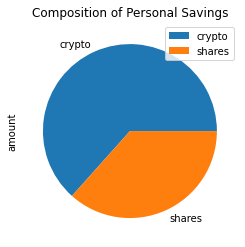

In [14]:
# Plot savings pie chart
df_savings.plot.pie(y="amount", title="Composition of Personal Savings")

In [15]:
# Set ideal emergency fund
emergency_fund = monthly_income * 3

# Calculate total amount of savings
total_savings = df_savings['amount'].sum()

# Validate saving health
if total_savings > emergency_fund:
    print('Congradulations! You have enough money in your emergency fund.')
if total_savings == emergency_fund:
    print('Congradulations! You have reached an ideal amount of money for an emergency fund.')
if total_savings < emergency_fund:
    print(f'You are ${(emergency_fund - total_savings)} from having an ideal amount of money for an emergency fund')
    


Congradulations! You have enough money in your emergency fund.


## Part 2 - Retirement Planning

### Monte Carlo Simulation

In [16]:
# Set start and end dates of five years back from today.
# Sample results may vary from the solution based on the time frame chosen
start_date = pd.Timestamp('2015-08-07', tz='America/New_York').isoformat()
end_date1 = pd.Timestamp('2018-08-07', tz='America/New_York').isoformat()
end_date2 = pd.Timestamp('2020-08-07', tz='America/New_York').isoformat()

In [17]:
# Get 5 years' worth of historical data for SPY and AGG
df_stock_data1 = api.get_barset(
    tickers,
    timeframe,
    start=start_date,
    end=end_date1,
    limit=756
).df

df_stock_data2 = api.get_barset(
    tickers,
    timeframe,
    start=end_date1,
    end=end_date2,
    limit=756
).df
df_stock_data = pd.concat([df_stock_data1,df_stock_data2])
# Display sample data
df_stock_data.head()

AGG                                         SPY  \
                             open      high      low   close   volume    open   
time                                                                            
2015-08-07 00:00:00-04:00  109.14  109.2750  109.035  109.21  2041167  208.16   
2015-08-10 00:00:00-04:00  109.15  109.1700  108.920  109.06  1149778  209.28   
2015-08-11 00:00:00-04:00  109.42  109.5765  109.284  109.42  1420907  208.98   
2015-08-12 00:00:00-04:00  109.55  109.7100  109.350  109.36  1468979  207.11   
2015-08-13 00:00:00-04:00  109.36  109.3651  109.110  109.15  1465173  208.73   

                                                              
                             high     low   close     volume  
time                                                          
2015-08-07 00:00:00-04:00  208.34  206.87  207.93   87669782  
2015-08-10 00:00:00-04:00  210.67  209.28  210.58   66755890  
2015-08-11 00:00:00-04:00  209.47  207.76  208.63   88424557  
2015-08-12 00:00:00-04:00  209.14  205.36  208.89  136171450  
2015-08-13 00:00:00-04:00  209.55  208.01  208.63   77197796

In [18]:
# Configuring a Monte Carlo simulation to forecast 30 years cumulative returns
MC_dist = MCSimulation(
    portfolio_data = df_stock_data,
    weights = [.40,.60],
    num_simulation = 500,
    num_trading_days = 252*30
)


In [19]:
# Printing the simulation input data
MC_dist.portfolio_data.head()

AGG                                      \
                             open      high      low   close   volume   
time                                                                    
2015-08-07 00:00:00-04:00  109.14  109.2750  109.035  109.21  2041167   
2015-08-10 00:00:00-04:00  109.15  109.1700  108.920  109.06  1149778   
2015-08-11 00:00:00-04:00  109.42  109.5765  109.284  109.42  1420907   
2015-08-12 00:00:00-04:00  109.55  109.7100  109.350  109.36  1468979   
2015-08-13 00:00:00-04:00  109.36  109.3651  109.110  109.15  1465173   

                                           SPY                          \
                          daily_return    open    high     low   close   
time                                                                     
2015-08-07 00:00:00-04:00          NaN  208.16  208.34  206.87  207.93   
2015-08-10 00:00:00-04:00    -0.001374  209.28  210.67  209.28  210.58   
2015-08-11 00:00:00-04:00     0.003301  208.98  209.47  207.76  208.63   
2015-08-12 00:00:00-04:00    -0.000548  207.11  209.14  205.36  208.89   
2015-08-13 00:00:00-04:00    -0.001920  208.73  209.55  208.01  208.63   

                                                   
                              volume daily_return  
time                                               
2015-08-07 00:00:00-04:00   87669782          NaN  
2015-08-10 00:00:00-04:00   66755890     0.012745  
2015-08-11 00:00:00-04:00   88424557    -0.009260  
2015-08-12 00:00:00-04:00  136171450     0.001246  
2015-08-13 00:00:00-04:00   77197796    -0.001245

In [20]:
# Running a Monte Carlo simulation to forecast 30 years cumulative returns
MC_dist.calc_cumulative_return()

Running Monte Carlo simulation number 0.
Running Monte Carlo simulation number 10.
Running Monte Carlo simulation number 20.
Running Monte Carlo simulation number 30.
Running Monte Carlo simulation number 40.
Running Monte Carlo simulation number 50.
Running Monte Carlo simulation number 60.
Running Monte Carlo simulation number 70.
Running Monte Carlo simulation number 80.
Running Monte Carlo simulation number 90.
Running Monte Carlo simulation number 100.
Running Monte Carlo simulation number 110.
Running Monte Carlo simulation number 120.
Running Monte Carlo simulation number 130.
Running Monte Carlo simulation number 140.
Running Monte Carlo simulation number 150.
Running Monte Carlo simulation number 160.
Running Monte Carlo simulation number 170.
Running Monte Carlo simulation number 180.
Running Monte Carlo simulation number 190.
Running Monte Carlo simulation number 200.
Running Monte Carlo simulation number 210.
Running Monte Carlo simulation number 220.
Running Monte Carlo si

,0,1,2,3,4,5,6,7,8,9,...,490,491,492,493,494,495,496,497,498,499
0,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,...,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000
1,0.998443,0.988349,0.990255,0.989576,1.011873,0.997611,1.002716,1.003430,1.002228,0.997261,...,0.991274,0.995679,0.998244,1.006596,1.003807,0.997020,1.004734,0.995844,0.998176,1.011158
2,0.999710,0.997245,1.010929,0.982491,1.000205,0.999269,1.001143,0.997473,0.986069,1.000886,...,1.009812,1.010594,0.984096,1.009282,1.018762,0.986646,0.992796,0.982957,0.989056,1.019378
3,0.991813,0.993482,1.008959,0.984034,1.000893,1.012426,1.001405,0.991865,0.977116,0.996984,...,1.012085,1.021729,0.989032,1.011517,1.008696,0.978675,0.983396,0.980690,0.985981,1.018419
4,1.002592,1.008954,1.018885,0.970248,0.998910,1.000411,1.012248,0.992242,0.969286,0.990779,...,1.005404,1.025678,0.984146,1.023003,0.999361,0.969058,0.974466,0.980342,0.988241,1.020075
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7556,3.913987,8.172286,3.274276,5.627173,6.839443,25.488579,3.014082,9.857110,10.184074,4.211622,...,7.439720,11.850219,11.048733,7.304520,6.784797,18.664518,35.863964,8.519208,21.080650,6.329970
7557,3.948268,8.226722,3.270507,5.652006,6.825667,25.508583,3.018252,9.857919,10.319220,4.269674,...,7.405556,11.886843,11.057388,7.272998,6.804824,18.914856,35.734637,8.509992,21.107911,6.380648
7558,3.937992,8.283806,3.287720,5.664432,6.817583,25.672499,3.034385,9.954081,10.355921,4.255873,...,7.445454,11.998113,11.016547,7.274228,6.831020,18.812543,35.384548,8.496377,20.743864,6.420963
7559,3.888728,8.268628,3.285145,5.630941,6.861251,25.953835,2.996506,9.861943,10.319519,4.234394,...,7.425925,11.964059,11.075439,7.267374,6.809379,18.812785,35.159483,8.487707,20.696027,6.409728


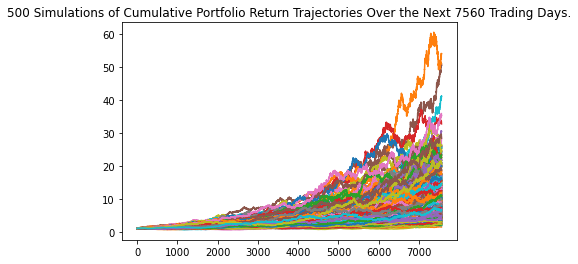

In [21]:
# Plot simulation outcomes
line_plot = MC_dist.plot_simulation()

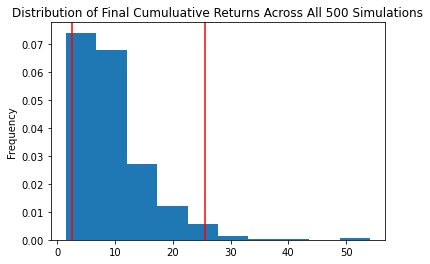

In [22]:
# Plot probability distribution and confidence intervals
dist_plot = MC_dist.plot_distribution()

### Retirement Analysis

In [23]:
# Fetch summary statistics from the Monte Carlo simulation results
MC_tbl = MC_dist.summarize_cumulative_return()

# Print summary statistics
print(MC_tbl)

count           500.000000
mean              9.670589
std               6.471178
min               1.439230
25%               5.250746
50%               8.396582
75%              12.133688
max              54.155834
95% CI Lower      2.428894
95% CI Upper     25.505552
Name: 7560, dtype: float64


### Calculate the expected portfolio return at the 95% lower and upper confidence intervals based on a `$20,000` initial investment.

In [24]:
# Set initial investment
initial_investment = 20000

# Use the lower and upper `95%` confidence intervals to calculate the range of the possible outcomes of our $20,000
ci_lower = round(MC_tbl[8]*initial_investment,2)
ci_upper = round(MC_tbl[9]*initial_investment,2)

# Print results
print(f"There is a 95% chance that an initial investment of ${initial_investment} in the portfolio"
      f" over the next 30 years will end within in the range of"
      f" ${ci_lower} and ${ci_upper}")

There is a 95% chance that an initial investment of $20000 in the portfolio over the next 30 years will end within in the range of $48577.89 and $510111.03


### Calculate the expected portfolio return at the `95%` lower and upper confidence intervals based on a `50%` increase in the initial investment.

In [25]:
# Set initial investment
initial_investment = 20000 * 1.5

# Use the lower and upper `95%` confidence intervals to calculate the range of the possible outcomes of our $30,000
ci_lower = round(MC_tbl[8]*initial_investment,2)
ci_upper = round(MC_tbl[9]*initial_investment,2)

# Print results
print(f"There is a 95% chance that an initial investment of ${initial_investment} in the portfolio"
      f" over the next 30 years will end within in the range of"
      f" ${ci_lower} and ${ci_upper}")

There is a 95% chance that an initial investment of $30000.0 in the portfolio over the next 30 years will end within in the range of $72866.83 and $765166.55


## Optional Challenge - Early Retirement


### Five Years Retirement Option

In [26]:
# Configuring a Monte Carlo simulation to forecast 5 years cumulative returns
MC_retire_dist = MCSimulation(
    portfolio_data = df_stock_data,
    weights = [.40,.60],
    num_simulation = 500,
    num_trading_days = 252*5
)

In [27]:
# Running a Monte Carlo simulation to forecast 5 years cumulative returns
MC_retire_dist.calc_cumulative_return()

Running Monte Carlo simulation number 0.
Running Monte Carlo simulation number 10.
Running Monte Carlo simulation number 20.
Running Monte Carlo simulation number 30.
Running Monte Carlo simulation number 40.
Running Monte Carlo simulation number 50.
Running Monte Carlo simulation number 60.
Running Monte Carlo simulation number 70.
Running Monte Carlo simulation number 80.
Running Monte Carlo simulation number 90.
Running Monte Carlo simulation number 100.
Running Monte Carlo simulation number 110.
Running Monte Carlo simulation number 120.
Running Monte Carlo simulation number 130.
Running Monte Carlo simulation number 140.
Running Monte Carlo simulation number 150.
Running Monte Carlo simulation number 160.
Running Monte Carlo simulation number 170.
Running Monte Carlo simulation number 180.
Running Monte Carlo simulation number 190.
Running Monte Carlo simulation number 200.
Running Monte Carlo simulation number 210.
Running Monte Carlo simulation number 220.
Running Monte Carlo si

,0,1,2,3,4,5,6,7,8,9,...,490,491,492,493,494,495,496,497,498,499
0,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,...,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000
1,1.006879,0.997596,0.989330,0.999880,1.001391,0.998488,0.983335,1.009734,1.003815,1.002406,...,1.009967,0.988314,1.001586,1.000224,0.999383,1.004206,1.002104,1.000884,0.992918,1.006457
2,1.002155,1.001855,0.997119,0.998744,0.973531,1.004600,0.975068,1.013922,1.004085,0.993099,...,1.005888,0.992121,0.990956,1.004787,0.999694,1.006634,0.993260,0.991456,1.001370,1.013422
3,1.007497,1.008630,0.989239,0.997179,0.970423,0.993636,0.979827,1.011163,0.989219,0.996156,...,1.006907,0.987990,1.003711,1.001368,1.015756,1.011083,0.999120,0.987806,0.995128,1.016784
4,1.020392,1.005116,0.985309,1.004766,0.958391,0.992023,0.966707,1.012999,0.996777,0.992659,...,1.010412,0.978480,1.000108,1.004172,1.008408,1.015572,1.004545,0.975807,0.983302,1.018429
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1256,1.942562,1.158568,1.525604,0.666514,1.497161,1.179687,1.362438,1.195049,1.050623,1.387237,...,0.962649,1.033405,0.989712,1.425028,2.965108,1.554311,2.159221,1.169670,1.386278,1.454872
1257,1.953938,1.150575,1.542580,0.671740,1.498429,1.188148,1.342526,1.210744,1.060455,1.394174,...,0.960730,1.020795,0.994085,1.419354,2.928970,1.563091,2.147177,1.179085,1.390361,1.459093
1258,1.932066,1.139750,1.546947,0.669844,1.499738,1.198071,1.330218,1.209382,1.060664,1.398287,...,0.967838,1.015738,1.002611,1.401902,2.919908,1.576643,2.137570,1.164684,1.384180,1.461356
1259,1.930439,1.139269,1.528253,0.662535,1.490586,1.207820,1.325338,1.214020,1.057758,1.395410,...,0.976764,1.007830,0.997933,1.415917,2.930701,1.569832,2.130164,1.163060,1.382903,1.449747


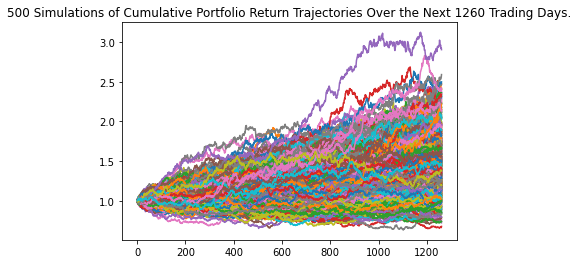

In [28]:
# Plot simulation outcomes
retire_line_plot = MC_retire_dist.plot_simulation()

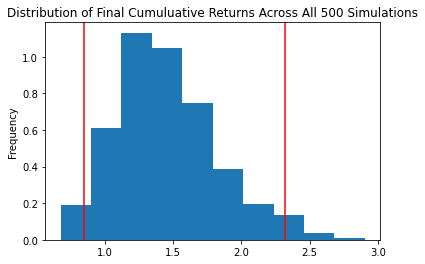

In [29]:
# Plot probability distribution and confidence intervals
retire_dist_plot = MC_retire_dist.plot_distribution()

In [30]:
# Fetch summary statistics from the Monte Carlo simulation results
MC_retire_tbl = MC_retire_dist.summarize_cumulative_return()

# Print summary statistics
print(MC_retire_tbl)

count           500.000000
mean              1.453764
std               0.373794
min               0.677547
25%               1.178814
50%               1.395632
75%               1.693196
max               2.904892
95% CI Lower      0.846881
95% CI Upper      2.318590
Name: 1260, dtype: float64


In [31]:
# Set initial investment
retire_initial_investment = 100000

# Use the lower and upper `95%` confidence intervals to calculate the range of the possible outcomes of our $60,000
ci_lower_five = round(MC_retire_tbl[8]*initial_investment,2)
ci_upper_five = round(MC_retire_tbl[9]*initial_investment,2)

# Print results
print(f"There is a 95% chance that an initial investment of ${initial_investment} in the portfolio"
      f" over the next 5 years will end within in the range of"
      f" ${ci_lower_five} and ${ci_upper_five}")

There is a 95% chance that an initial investment of $30000.0 in the portfolio over the next 5 years will end within in the range of $25406.43 and $69557.7


### Ten Years Retirement Option

In [32]:
# Configuring a Monte Carlo simulation to forecast 10 years cumulative returns
MC_retire10_dist = MCSimulation(
    portfolio_data = df_stock_data,
    weights = [.40,.60],
    num_simulation = 500,
    num_trading_days = 252*5
)

In [33]:
# Running a Monte Carlo simulation to forecast 10 years cumulative returns
MC_retire10_dist.calc_cumulative_return()

Running Monte Carlo simulation number 0.
Running Monte Carlo simulation number 10.
Running Monte Carlo simulation number 20.
Running Monte Carlo simulation number 30.
Running Monte Carlo simulation number 40.
Running Monte Carlo simulation number 50.
Running Monte Carlo simulation number 60.
Running Monte Carlo simulation number 70.
Running Monte Carlo simulation number 80.
Running Monte Carlo simulation number 90.
Running Monte Carlo simulation number 100.
Running Monte Carlo simulation number 110.
Running Monte Carlo simulation number 120.
Running Monte Carlo simulation number 130.
Running Monte Carlo simulation number 140.
Running Monte Carlo simulation number 150.
Running Monte Carlo simulation number 160.
Running Monte Carlo simulation number 170.
Running Monte Carlo simulation number 180.
Running Monte Carlo simulation number 190.
Running Monte Carlo simulation number 200.
Running Monte Carlo simulation number 210.
Running Monte Carlo simulation number 220.
Running Monte Carlo si

,0,1,2,3,4,5,6,7,8,9,...,490,491,492,493,494,495,496,497,498,499
0,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,...,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000
1,0.993172,1.010259,1.002505,0.996563,1.006720,1.005274,1.001708,0.995723,0.998771,1.006622,...,0.997294,1.013647,0.998772,0.993633,1.015299,0.990839,0.999983,0.999045,1.009760,0.992520
2,0.988982,1.003034,1.004070,1.015753,0.998245,1.009592,1.015329,0.993403,0.987880,1.010298,...,0.996595,1.013500,1.013503,0.999769,1.026977,0.997790,0.992498,0.999998,1.017485,0.998926
3,0.992804,1.003814,0.998855,1.017569,1.005350,1.023184,1.026520,0.998745,0.984979,1.013790,...,0.992200,1.008129,1.018181,1.005188,1.022734,0.994006,0.979858,1.006671,1.027991,0.998417
4,0.995836,1.001456,1.004294,1.018687,1.008098,1.017060,1.023504,0.994174,0.972604,1.016045,...,0.997490,1.009228,1.037224,1.002399,1.014987,0.993688,0.979399,1.003343,1.037826,0.998417
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1256,1.253630,1.322400,1.635439,1.007659,1.216406,0.802583,1.186623,1.244841,2.102926,1.676489,...,0.860193,1.366348,1.614802,2.112377,1.260330,1.591184,0.731484,1.219619,1.164843,1.824807
1257,1.264525,1.335113,1.644727,1.017435,1.218872,0.808995,1.192523,1.236784,2.096906,1.663748,...,0.856778,1.382350,1.624298,2.102694,1.256931,1.603751,0.736298,1.237446,1.171906,1.845761
1258,1.263567,1.332593,1.657418,1.024070,1.214785,0.806595,1.187282,1.233526,2.098811,1.651986,...,0.855494,1.389789,1.626491,2.115344,1.248207,1.595135,0.744049,1.231914,1.174281,1.836712
1259,1.251772,1.343318,1.650461,1.035450,1.216664,0.809386,1.179877,1.227627,2.129134,1.644454,...,0.846986,1.381690,1.600067,2.119664,1.252088,1.593278,0.740045,1.211613,1.178520,1.839536


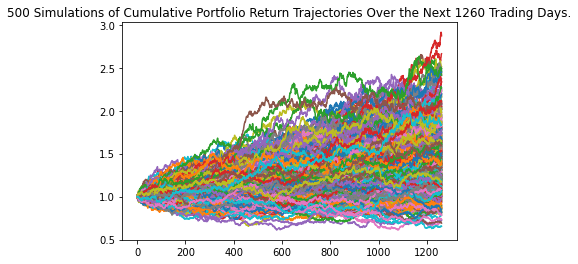

In [34]:
# Plot simulation outcomes
retire10_line_plot = MC_retire10_dist.plot_simulation()

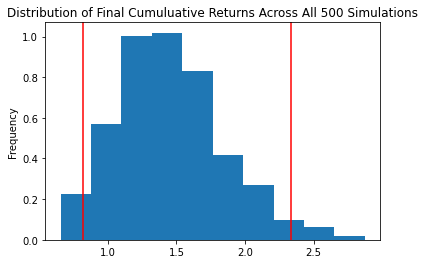

In [35]:
# Plot probability distribution and confidence intervals
retire10_dist_plot = MC_retire10_dist.plot_distribution()

In [36]:
# Fetch summary statistics from the Monte Carlo simulation results
MC_retire10_tbl = MC_retire10_dist.summarize_cumulative_return()

# Print summary statistics
print(MC_retire10_tbl)

count           500.000000
mean              1.453981
std               0.381832
min               0.654852
25%               1.177065
50%               1.427282
75%               1.667209
max               2.873187
95% CI Lower      0.819954
95% CI Upper      2.336728
Name: 1260, dtype: float64


In [37]:
# Set initial investment
retire_initial_investment = 100000

# Use the lower and upper `95%` confidence intervals to calculate the range of the possible outcomes of our $60,000
ci_lower_ten = round(MC_retire_tbl[8]*initial_investment,2)
ci_upper_ten = round(MC_retire_tbl[9]*initial_investment,2)

# Print results
print(f"There is a 95% chance that an initial investment of ${initial_investment} in the portfolio"
      f" over the next 10 years will end within in the range of"
      f" ${ci_lower_ten} and ${ci_upper_ten}")

There is a 95% chance that an initial investment of $30000.0 in the portfolio over the next 10 years will end within in the range of $25406.43 and $69557.7
